In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report ,accuracy_score ,  confusion_matrix , precision_score , recall_score

# preprocessing

In [3]:
data = pd.read_csv('CAR_EVALUATION.csv')

In [4]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,Target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Target    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
data[data.duplicated()]

,buying,maint,doors,persons,lug_boot,safety,Target


In [7]:
data['doors'].value_counts()

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

In [8]:
data['persons'].value_counts()

persons
2       576
4       576
more    576
Name: count, dtype: int64

In [9]:
cols =[	'buying', 'maint', 'doors',	'persons', 'lug_boot', 'safety', 'Target']
for col in cols:
    print(data[col].value_counts().index)

Index(['vhigh', 'high', 'med', 'low'], dtype='object', name='buying')
Index(['vhigh', 'high', 'med', 'low'], dtype='object', name='maint')
Index(['2', '3', '4', '5more'], dtype='object', name='doors')
Index(['2', '4', 'more'], dtype='object', name='persons')
Index(['small', 'med', 'big'], dtype='object', name='lug_boot')
Index(['low', 'med', 'high'], dtype='object', name='safety')
Index(['unacc', 'acc', 'good', 'vgood'], dtype='object', name='Target')


### Encoding

 #### OrdinalEncoder
   *   buying
   *   maint
   *   lug_boot
   *   safety
   *   Target



#### OneHotEncoder
   * doors
   * persons

In [10]:
# Ordinal

# buying, maint
encoder1  = OrdinalEncoder(categories=[['low', 'med', 'high', 'vhigh']])
data['buying'] = encoder1.fit_transform(data[['buying']])
data['maint'] = encoder1.fit_transform(data[['maint']])

# lug_boot
encoder2  = OrdinalEncoder(categories=[['small', 'med', 'big']])
data['lug_boot'] = encoder2.fit_transform(data[['lug_boot']])

# safety
encoder3  = OrdinalEncoder(categories=[['low', 'med', 'high']])
data['safety'] = encoder3.fit_transform(data[['safety']])

# Target
encoder4  = OrdinalEncoder(categories=[['unacc', 'acc', 'good', 'vgood']])
data['Target'] = encoder4.fit_transform(data[['Target']])

In [11]:
# OneHotEncoder

# doors
encoder1 =OneHotEncoder(sparse_output=False)
doors_encoding = encoder1.fit_transform(data[['doors']])
doors = pd.DataFrame(doors_encoding , columns=encoder1.get_feature_names_out(['doors']) )

# persons
encoder1 =OneHotEncoder(sparse_output=False)
persons_encoding = encoder1.fit_transform(data[['persons']])
persons = pd.DataFrame(persons_encoding , columns=encoder1.get_feature_names_out(['persons']) )

In [12]:
data = data.drop(columns=['doors', 'persons'])

In [13]:
data = pd.concat([data, doors, persons], axis=1)
data

,buying,maint,lug_boot,safety,Target,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more
0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,3.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1724,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1725,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1726,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [14]:
# Split data into x, y
X = data.drop('Target', axis=1)
y =data['Target']

In [15]:
# Split data into train, val, test
# train = 1000, val = 300, test = 428

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=428, random_state=42, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=300, random_state=42, shuffle=True)

In [16]:
y_train.value_counts()

Target
0.0    693
1.0    223
2.0     47
3.0     37
Name: count, dtype: int64

In [17]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)
X_val, y_val = sm.fit_resample(X_val, y_val)

In [18]:
y_train.value_counts()

Target
0.0    693
1.0    693
3.0    693
2.0    693
Name: count, dtype: int64

# Building the model

In [19]:
accuracy_scores_test = []
accuracy_scores_val = []

for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]: #
    model = KNeighborsClassifier(n_neighbors=2 )
    model.fit(X_train[: int(1000*i)] , y_train[: int(1000*i)])

    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    accuracy_scores_val.append(accuracy_score(y_val, y_val_pred))
    accuracy_scores_test.append(accuracy_score(y_test, y_test_pred))

In [20]:
Percentages = ['10%', '20%', '30%', '40%','50%', '60%', '70%', '80%', '90%', '100%']

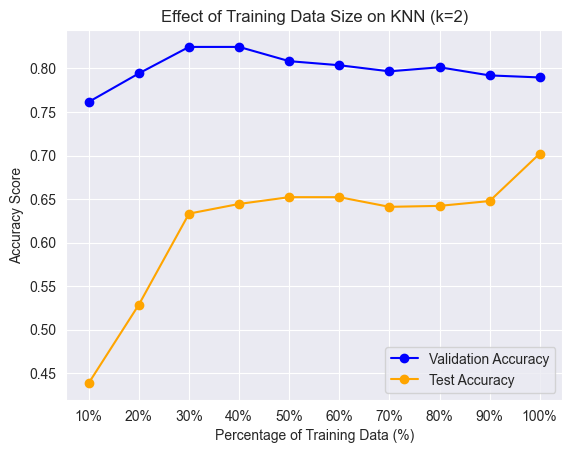

In [21]:
plt.plot(Percentages, accuracy_scores_test, c='b', marker='o', label="Validation Accuracy")
plt.plot(Percentages, accuracy_scores_val, c='orange', marker='o', label="Test Accuracy")

plt.xlabel("Percentage of Training Data (%)")
plt.ylabel("Accuracy Score")
plt.title("Effect of Training Data Size on KNN (k=2)")
plt.legend()
plt.show()

In [22]:
accuracy_scores_val = []

for k in range(1, 11): #
    model = KNeighborsClassifier(n_neighbors=k )
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    accuracy_scores_val.append(accuracy_score(y_val, y_val_pred))

In [66]:
max(accuracy_scores_val)

0.8033333333333333

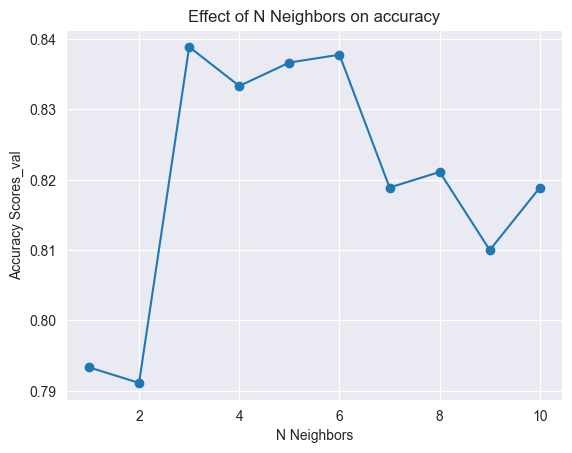

'\nFrom the plot, the optimal number of neighbors (N) is 4,\nand this can be determined using grid search.\n'

In [23]:
plt.plot(range(1 , 11) , accuracy_scores_val , marker = 'o')
plt.xlabel('N Neighbors')
plt.ylabel('Accuracy Scores_val')
plt.title("Effect of N Neighbors on accuracy")
plt.show()

"""
From the plot, the optimal number of neighbors (N) is 4,
and this can be determined using grid search.
"""

In [24]:
import time

In [25]:
list_time = []

In [26]:
# case 1
time_start = time.time()

model1 = KNeighborsClassifier(n_neighbors=2)
model1.fit(X_train[: int(1000*0.1)], y_train[: int(1000*0.1)])

time_of_cass1 = time.time() - time_start
list_time.append(time_of_cass1)
print("Time of cass 1: ", time_of_cass1)

Time of cass 1:  0.003117799758911133


In [27]:
# case 2
time_start = time.time()

model2 = KNeighborsClassifier(n_neighbors=2)
model2.fit(X_train, y_train)

time_of_cass2 = time.time() - time_start
list_time.append(time_of_cass2)
print("Time of cass 2: ", time_of_cass2)

Time of cass 2:  0.005540132522583008


In [28]:
# case 3
time_start = time.time()

model3 = KNeighborsClassifier(n_neighbors=10)
model3.fit(X_train[: int(1000*0.1)], y_train[: int(1000*0.1)])

time_of_cass3 = time.time() - time_start
list_time.append(time_of_cass3)
print("Time of cass 3: ", time_of_cass3)

Time of cass 3:  0.0021119117736816406


In [29]:
# case 4
time_start = time.time()

model4 = KNeighborsClassifier(n_neighbors=10)
model4.fit(X_train, y_train)

time_of_cass4 = time.time() - time_start
list_time.append(time_of_cass4)
print("Time of cass 4: ", time_of_cass4)

Time of cass 4:  0.005830049514770508


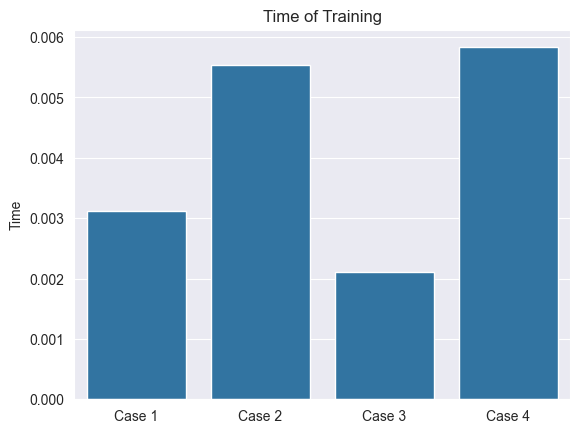

In [30]:
sns.barplot(x=["Case 1", "Case 2", "Case 3", "Case 4"], y=list_time)
plt.ylabel("Time")
plt.title("Time of Training")
plt.show()

# Summary



## ( C )
 * As the percentage of training data increases,
   * the model's accuracy on the test data also increases,
   * while the accuracy on the validation data remains relatively constant.

## ( D )
  * When we used 100% of the data and varied the value of n_neighbors,
     * we found that the best value for n_neighbors was 3.

## ( F )
  * The training time is different in all four cases.
    * As the percentage of training data increases, the time also increases.
    * As the value of n_neighbors increases, the execution time also increases.